# Quantum Harmonic Oscillator

One of the earliest physical systems students encounter in quantum mechanics is the harmonic oscillator (classically, the mass-on-a-spring problem) which has applications to the vibrations of molecules and quantum field theory. The Schr&ouml;dinger equation for the harmonic oscillator is

\\[
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + \frac{1}{2} m \omega^2 x^2 \psi= E \psi
\\]

Making the substitution $\xi = x\sqrt{m\omega/\hbar}$, this equation simplifies to

\\[
\frac{1}{2} \left(-\frac{d^2}{d\xi^2} + \xi^2 \right)\psi = \frac{E}{\hbar\omega} \psi
\\]

which is dimensionless. The normalized solutions of this differential equation (solved either by the [ladder operator method](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator#Ladder_operator_method) or the [method of Frobenius](https://en.wikipedia.org/wiki/Frobenius_method)) are given by

\\[
\psi_n(\xi) = \frac{1}{\sqrt{2^n n! \sqrt{\tau/2}}}H_n(\xi) \, e^{-\xi^2/2},
\\]

where $H_n(x)$ are the Hermite polynomials,

\\[
H_n(x) = (-1)^n e^{x^2} \frac{d^n}{dx^n} e^{-x^2},
\\]

and the energies of the system are given by $E_n = \left(n+\frac{1}{2} \right) \hbar \omega$.

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 14)
# plt.style.use('dark_background')

Let's define a function which returns the n<sup>th</sup> normalized wavefunction.

In [3]:
def SHO_WF_norm(x, n):
    """Returns the nth normalized wavefunction for the quantum harmonic oscillator."""
    return sp.eval_hermite(n, x) * np.exp(-x**2/2)/(2**(n-0.5)*np.math.factorial(n)*np.math.tau**0.5)**0.5

# This function sets the turning points of the wavefunction to x = 1 and renormalizes it.
def SHO_WF_tp1(x, n):
    """Returns the nth normalized wavefunction for the quantum harmonic oscillator
    with the classical turning points set to x = +/- 1."""
    return SHO_WF_norm(x*(2*n + 1)**0.5,n)*(2*n+1)**0.25

Below is a plot of the wavefunction and probability density function of the _n_<sup>th</sup> state of the quantum harmonic oscillator compared to the classical probability distribution. The <i>x</i>-axis is scaled so that 1 is the classical turning point (amplitude) of the oscillation. (For the n<sup>th</sup> quantum state, $A_n = \sqrt{(2n+1)\hbar/m\omega}$.)

In [4]:
def QHO_plot(n, savefig=False):
    xmax = 1 + 2/(2*n + 1)**0.5
    x = np.linspace(-xmax, xmax, num=4096, endpoint=True)

    xmin = min(x)
    ymin = min(SHO_WF_tp1(x, n))*1.1
    ymax = max([max(SHO_WF_tp1(x, n)),
                max(SHO_WF_tp1(x, n)**2)])*1.1

    xamp = (1.-(np.math.tau/2*ymax)**(-2))**(0.5)
    xcl = np.linspace(-xamp, xamp, num=4096, endpoint=True)
    Pcl = (1.-xcl**2)**(-.5)*2/np.math.tau
    
    if savefig:
        plt.figure(dpi=300)
    else:
        plt.figure(dpi=100)
    plt.plot(x, SHO_WF_tp1(x, n), 'b-',
             x, SHO_WF_tp1(x, n)**2, 'r-',
             xcl, Pcl, 'k-', x, 0*x, 'k-')
    plt.legend(['$\psi(x)$', '$|\psi(x)|^2$', \
                '$P_\mathrm{cl}(x)$'], loc='best')
    plt.xlim([xmin,xmax])
    plt.title('Plot of the $n = {:d}$ state of the quantum harmonic oscillator'.format(n))
    # plt.ylim([ymin,ymax])
    plt.xlabel('$x/A$');
    if savefig:
        plt.savefig('fig/showavefcn{:03d}.svg'.format(n))

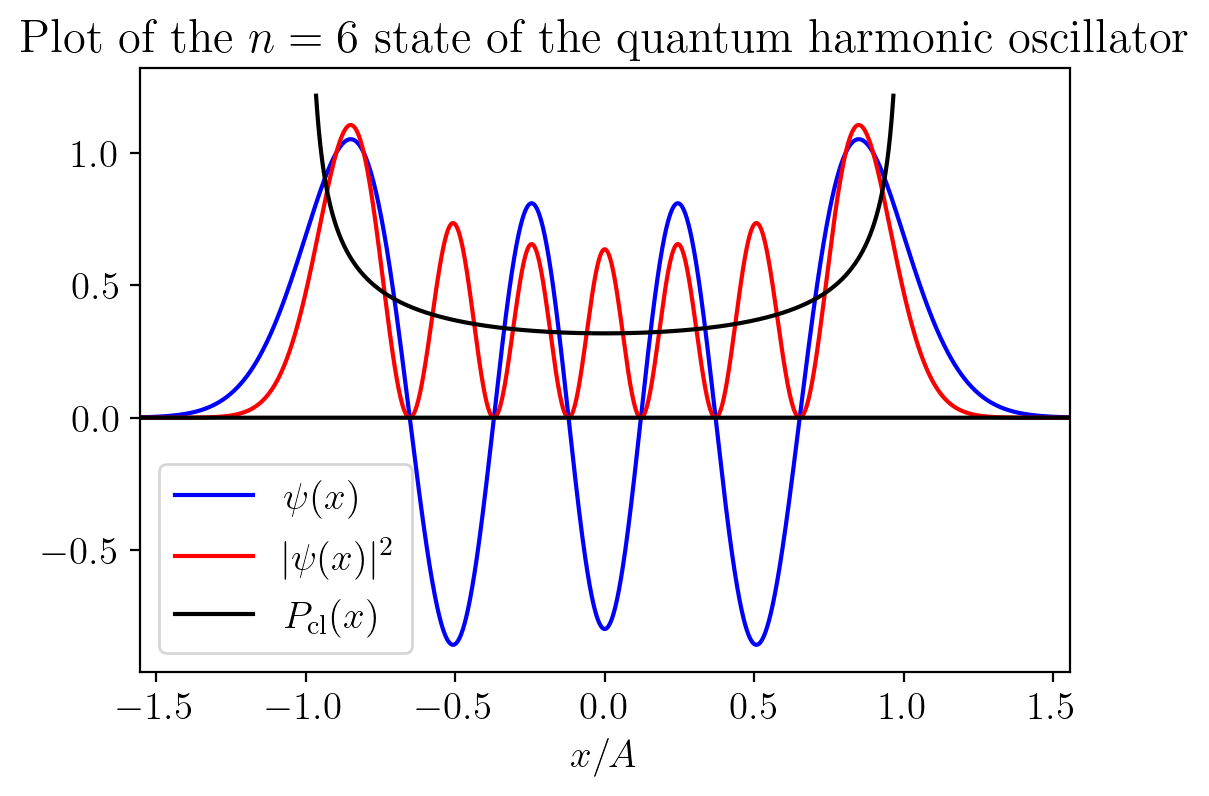

In [5]:
QHO_plot(6)

Below is a plot of just the probability distribution for the <i>n</i> = 100 level.

In [6]:
n = 100
def QHO_prob_plot(n, savefig=False):
    xmax = 1 + 2/(2*n + 1)**0.5
    x = np.linspace(-xmax, xmax, num=4096, endpoint=True)

    xmin = min(x)
    ymin = min(SHO_WF_tp1(x, n))*1.1
    ymax = max([max(SHO_WF_tp1(x, n)),
                max(SHO_WF_tp1(x, n)**2)])*1.1

    xamp = (1.-(np.math.tau/2*ymax)**(-2))**(0.5)
    xcl = np.linspace(-xamp, xamp, num=4096, endpoint=True)
    Pcl = (1.-xcl**2)**(-.5)*2/np.math.tau
    
    if savefig:
        plt.figure(dpi=300)
    else:
        plt.figure(dpi=100)
    plt.plot(x, SHO_WF_tp1(x, n)**2, 'r-',
             xcl, Pcl, 'k-', x, 0*x, 'k-')
    plt.legend(['$|\psi_n(x)|^2$', \
                '$P_\mathrm{cl}(x)$'], loc='best')
    plt.xlim([xmin,xmax])
    plt.title('Plot of the $n = {:d}$ state of the quantum harmonic oscillator'.format(n))
    # plt.ylim([ymin,ymax])
    plt.xlabel('$x/A_n$');
    if savefig:
        plt.savefig('fig/shoprob{:03d}.svg'.format(n))

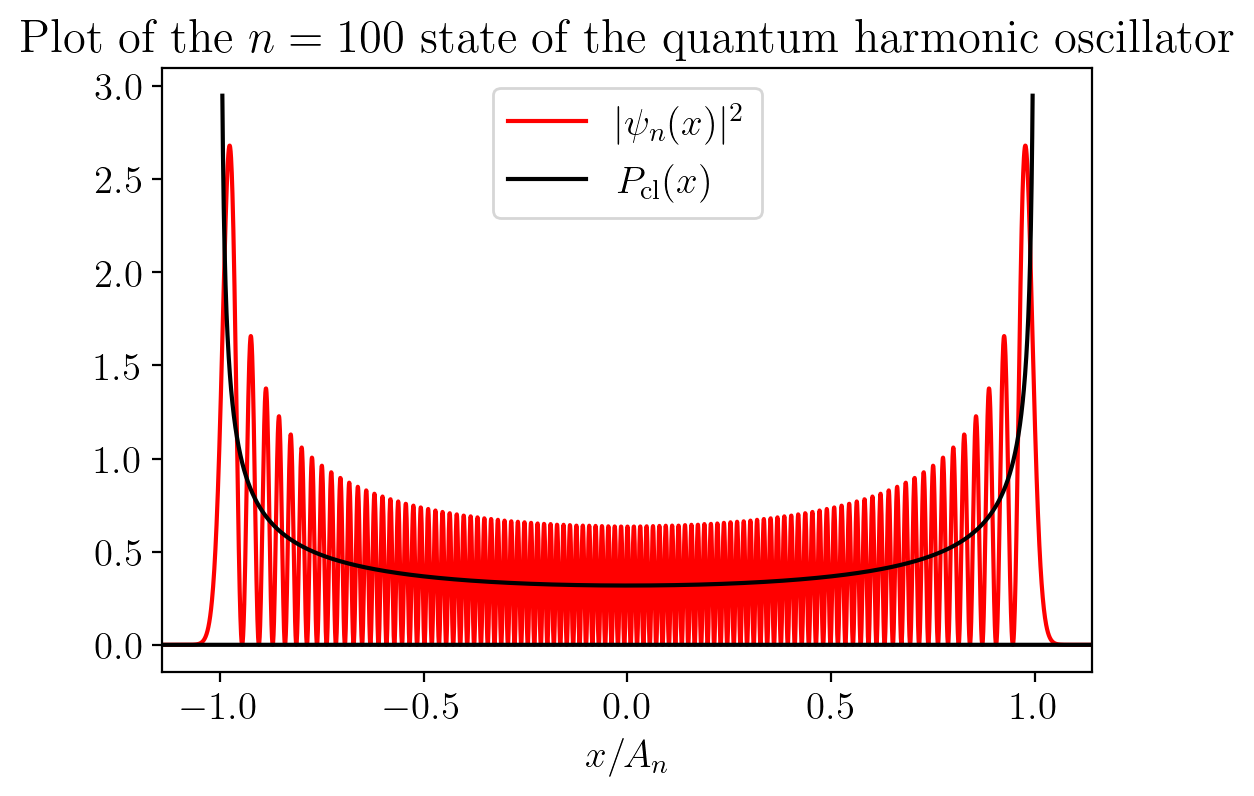

In [7]:
QHO_prob_plot(100)

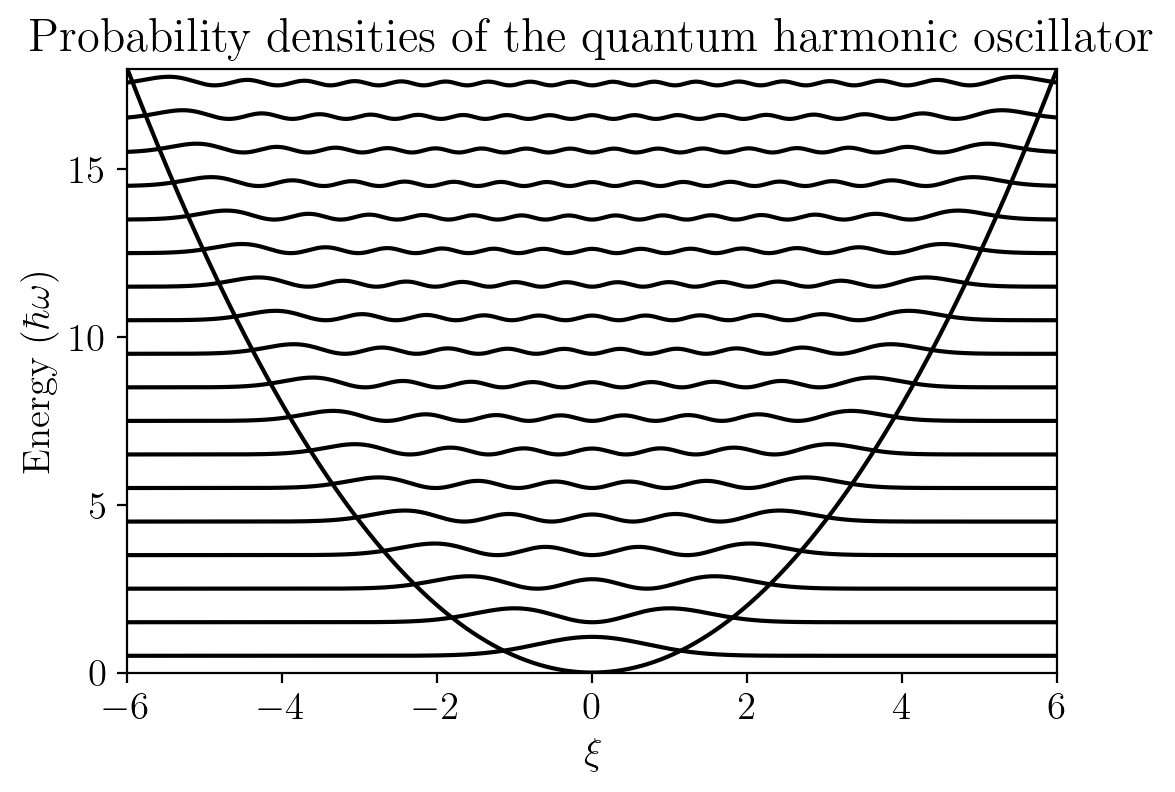

In [8]:
x = np.linspace(-6, 6,  num=4096, endpoint=True)
xmax = max(x)
xmin = min(x)
ymin = 0
ymax = 0.5*xmax**2

# Plot the things!
plt.figure(dpi = 100)
for n in range(20):
    plt.plot(x, SHO_WF_norm(x, n)**2 + n + 0.5, 'k-')
plt.plot(x, .5*x**2, 'k-')
# plt.legend(['$\psi_\mathrm{odd}(x)$',\
#             '$|\psi_\mathrm{odd}(x)|^2$', '$P_\mathrm{cl}(x)$'], loc='best')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.xlabel(r'$\xi$')
plt.ylabel(r'Energy ($\hbar\omega$)')
plt.title('Probability densities of the ' + 'quantum harmonic oscillator');
# plt.savefig('fig/qhoplot.svg')